### (0 баллов) Считываем данные

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Каждая квартира имеет 13 признаков:

In [ ]:
X = dataset['data']
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [ ]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [ ]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [ ]:
data = pd.DataFrame(data=dataset['data'], columns = dataset['feature_names'])
data['MEDV'] = dataset['target']
data.to_csv('boston.txt', sep = ',', index = False)

In [ ]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# Обучаем нашу модель
reg.fit(X_train, y_train)

# Предсказываем на тестовой части
y_pred = reg.predict(X_test)

### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [ ]:
from sklearn.metrics import mean_squared_error
def MSE(y_real, y_pred):
    return 1/y_real.shape[0] * np.sum((y_real - y_pred)**2)

In [ ]:
my_mse = MSE(y_test, y_pred)
print(my_mse)

print(mean_squared_error(y_pred, y_test))

28.311867672833653
28.311867672833653


Поссчитали результат и убедились, что моя реализация MSE совпадает с реализацией из sklearn

Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [ ]:
np.mean(y_train), y_train.shape

(22.415824175824174, (455,))

In [ ]:
y_pred_naive = np.full(455, 22.731208791208793)

In [ ]:
print(mean_squared_error(y_pred_naive, y_train))

80.2433049631687


Получается мы не так плохо предсказали цену, так как наивный алгоритм даёт ошибку намного хуже

### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

lambdas = np.arange(0.1, 4.0, 0.2)
# Выведем доступные lambda
print("Все лямбды:")
print(lambdas)

# Лямбды и их ошибки на обучающей выборке
lambda_errors = []

# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    reg = Ridge(alpha=val).fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    # Сохраняем ошибку на обучающей выборке
    lambda_errors.append((val, mean_squared_error(y_pred, y_test)))
    print(((val, mean_squared_error(y_pred, y_test))))
    

min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])

# Вычислим ошибку на кросс-валидации
# Лучшая модель
best_reg = Ridge(alpha=min_val)
cv_error = -np.mean(cross_val_score(best_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))

print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, cv_error))

Все лямбды:
[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1 3.3 3.5
 3.7 3.9]
(0.1, 28.22798033947074)
(0.30000000000000004, 28.107901061762103)
(0.5000000000000001, 28.030139607289257)
(0.7000000000000001, 27.979258556009846)
(0.9000000000000001, 27.946214017839658)
(1.1000000000000003, 27.925431244133502)
(1.3000000000000003, 27.9133273687064)
(1.5000000000000004, 27.90751789967985)
(1.7000000000000004, 27.90636819413827)
(1.9000000000000004, 27.90872878242229)
(2.1000000000000005, 27.913773320671808)
(2.3000000000000007, 27.92089616020793)
(2.5000000000000004, 27.929645767708198)
(2.7000000000000006, 27.939680368848904)
(2.900000000000001, 27.950737742963824)
(3.1000000000000005, 27.96261424676035)
(3.3000000000000007, 27.9751499876863)
(3.500000000000001, 27.98821817516935)
(3.7000000000000006, 28.00171736046208)
(3.900000000000001, 28.015565705906575)

Оптимальная lambda:
Lambda=1.70, результат=24.10


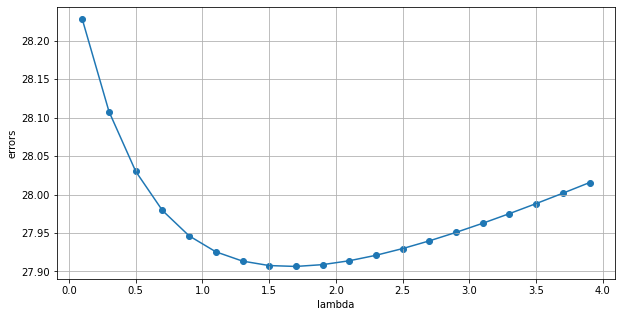

In [ ]:
lambda_errors = np.array(lambda_errors)

plt.figure(figsize=(10, 5))
plt.scatter(lambda_errors[:, 0], lambda_errors[:, 1])
plt.plot(lambda_errors[:, 0], lambda_errors[:, 1])
plt.grid()
plt.xlabel("lambda")
plt.ylabel("errors")
plt.show()

Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

Да, регуляризация помогла снизить ошибку. При этом, чтобы ошибка была минимальной, надо выбрать коэффициент Lambda=1.70, а ошибка при этом равна 24.10

После проведённых эксперементов мы выяснили, что, во-первых, наивный алгоритм даёт намного большую ошибку, чем линейная регрессия, а, во-вторых, применение регуляризации улучшает результат.